## Inspecting Visual Assessment Tendency for Pre-clustering:

Before we try to determine the clusters of a dataset, we need to check whether the data can be grouped into clusters. This is called pre-clustering. We can use a technique called Visual Assessment of Tendency (VAT) that allows us to assess cluster tendency through a map based on the dissimilarity matrix. The algorithm creates a matrix consisting of pairwise distances between data points, reorders this matrix and displays them as the black squares on the map. By visually inspecting this map, we can conclude how many clusters there are and if there are any hierarchy within the clusters.
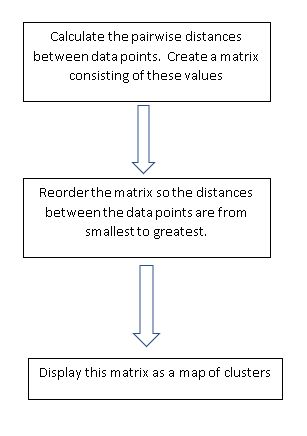
There is also an improved Visual Assessment Tendecy (iVAT) which serves the same purpose as VAT but provides more precise and clearer visual.

We will use the following vat() and ivat() functions which can be found in pyclustertend library.

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt



def vat(data, return_odm=False, figure_size=(10, 10)):
    """VAT means Visual assesement of tendency. basically, it allow to asses cluster tendency
    through a map based on the dissimiliraty matrix.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
        boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix plotted.

    """

    ordered_dissimilarity_matrix = compute_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_dissimilarity_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_dissimilarity_matrix))

    if return_odm is True:
        return ordered_dissimilarity_matrix



def compute_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by visual assesement of tendency. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    ODM : matrix
        the ordered dissimalarity matrix .

    """

    # Step 1 :

    observation_path = []

    matrix_of_pairwise_distance = pairwise_distances(X)
    list_of_int = np.zeros(matrix_of_pairwise_distance.shape[0], dtype="int")

    index_of_maximum_value = np.argmax(matrix_of_pairwise_distance)

    column_index_of_maximum_value = index_of_maximum_value // matrix_of_pairwise_distance.shape[1]

    list_of_int[0] = column_index_of_maximum_value
    observation_path.append(column_index_of_maximum_value)

    K = np.linspace(0, matrix_of_pairwise_distance.shape[0] - 1, matrix_of_pairwise_distance.shape[0], dtype="int")
    J = np.delete(K, column_index_of_maximum_value)

    # Step 2 :

    for r in range(1, matrix_of_pairwise_distance.shape[0]):

        p, q = (-1, -1)

        mini = np.max(matrix_of_pairwise_distance)

        for candidate_p in observation_path:
            for candidate_j in J:
                if matrix_of_pairwise_distance[candidate_p, candidate_j] < mini:
                    p = candidate_p
                    q = candidate_j
                    mini = matrix_of_pairwise_distance[p, q]

        list_of_int[r] = q
        observation_path.append(q)

        ind_q = np.where(np.array(J) == q)[0][0]
        J = np.delete(J, ind_q)

    # Step 3

    ordered_matrix = np.zeros(matrix_of_pairwise_distance.shape)

    for column_index_of_maximum_value in range(ordered_matrix.shape[0]):
        for j in range(ordered_matrix.shape[1]):
            ordered_matrix[column_index_of_maximum_value, j] = matrix_of_pairwise_distance[
                list_of_int[column_index_of_maximum_value], list_of_int[j]]

    # Step 4 :

    return ordered_matrix




def ivat(data, return_odm=False, figure_size=(10, 10)):
    """iVat return a visualisation based on the Vat but more reliable and easier to
    interpret.


    Parameters
    ----------

    data : matrix
        numpy array

    return_odm : return the Ordered Dissimalirity Matrix
            boolean (default to False)

    figure_size : size of the VAT.
        tuple (default to (10,10))


    Return
    -------

    D_prim : matrix
        the ivat ordered dissimalarity matrix.

    """

    ordered_matrix = compute_ivat_ordered_dissimilarity_matrix(data)

    _, ax = plt.subplots(figsize=figure_size)
    ax.imshow(ordered_matrix, cmap='gray', vmin=0, vmax=np.max(ordered_matrix))

    if return_odm is True:
        return ordered_matrix




def compute_ivat_ordered_dissimilarity_matrix(X):
    """The ordered dissimilarity matrix is used by ivat. It is a just a a reordering
    of the dissimilarity matrix.


    Parameters
    ----------

    X : matrix
        numpy array

    Return
    -------

    D_prim : matrix
        the ordered dissimalarity matrix .

    """

    ordered_matrix = compute_ordered_dissimilarity_matrix(X)
    re_ordered_matrix = np.zeros((ordered_matrix.shape[0], ordered_matrix.shape[0]))

    for r in range(1, ordered_matrix.shape[0]):
        # Step 1 : find j for which D[r,j] is minimum and j in [1:r-1]

        j = np.argmin(ordered_matrix[r, 0:r])

        # Step 2 :

        re_ordered_matrix[r, j] = ordered_matrix[r, j]

        # Step 3 : pour c : 1,r-1 avec c !=j
        c_tab = np.array(range(0, r))
        c_tab = c_tab[c_tab != j]

        for c in c_tab:
            re_ordered_matrix[r, c] = max(ordered_matrix[r, j], re_ordered_matrix[j, c])
            re_ordered_matrix[c, r] = re_ordered_matrix[r, c]

    return re_ordered_matrix

In [2]:
#import necessary libraries:
import glob
import pandas as pd
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# absolute path to search all PMG files inside a specific folder
path = r'*.PGM'
files = glob.glob(path)

C:\Users\h\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
files

['4cov.PGM',
 'No_Clust.PGM',
 'No_Clust_nois_pt_01.PGM',
 'Three_Close_Clust.PGM',
 'Three_Close_Clust_nois_pt005.PGM',
 'Two_Clus_Diff_Density.PGM',
 'Two_Clus_Diff_Size.PGM',
 'Two_Ellip_Diff_Density.PGM',
 'Two_Ellip_Diff_Size.PGM',
 'Two_Separat_Clust.PGM',
 'Two_Separat_Clust_nois_pt005.PGM']

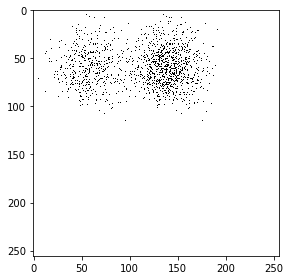

In [4]:
#Show one of the images
skimage.io.imshow("Two_Clus_Diff_Density.PGM", cmap='gray')

The image has black dots on a white background. Black dots are going to be investigated by the algorithm, so, we need to create an array where black dots have the value of 1 and white pixels have the value of 0 as they are irrelevant. Then, we will apply ivat() function to the obtained array.

### Image 1:

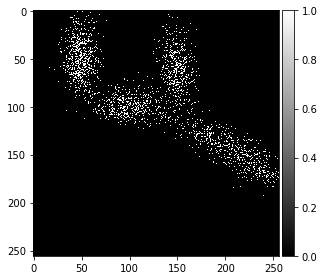

In [5]:
im = skimage.io.imread(files[0])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

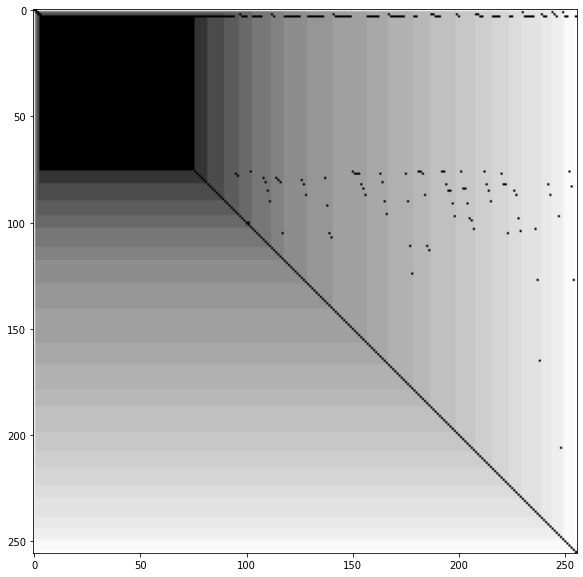

In [6]:
ivat(im)

In the image, all data points look like one big cluster. So, the map shows one dominant black square. However, we can also see the 4 groups in the map represented by the squares a little bigger than the black square. The colors start fading after the first 4 squares.

### Image 2:

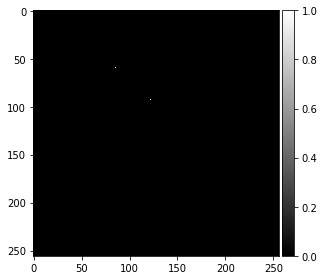

In [7]:
im = skimage.io.imread(files[1])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

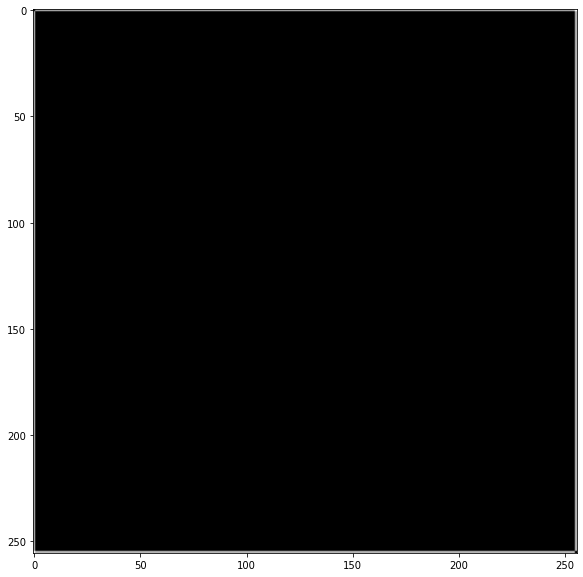

In [8]:
vat(im)

Here, we have only two dots as data points. In the map, we see one big square (corresponding to the first data point) and one tiny square at the very far right lower part (corresponding to the second data point). The algorithm thought the first data point is a cluster of its own. If we added more points, depending on the distances, we would see more clusters. 

### Image 3:

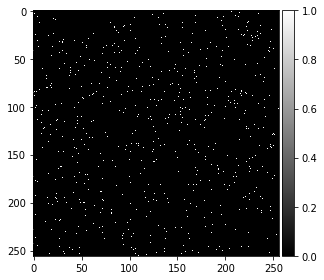

In [9]:
im = skimage.io.imread(files[2])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

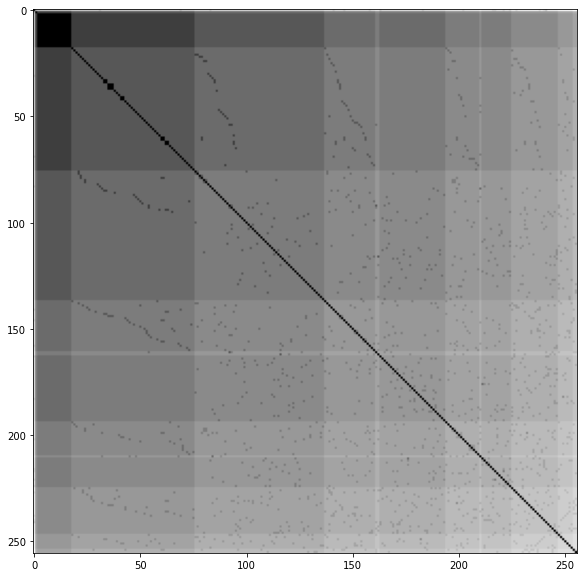

In [10]:
vat(im)

In image 3 we don't see clustering tendency. All data points seem to be spread out evenly in the image, but in some parts, the distance between the data points are even greater (No data points fall in some of the large black sections.) So, map reflects these findings. Apparently, the algorithm thinks all data points belong to one cluster which is represented by the one black square on top left. The rest of the squares are very similar in their shades, so, we can't make more than one cluster. 

### Image 4:

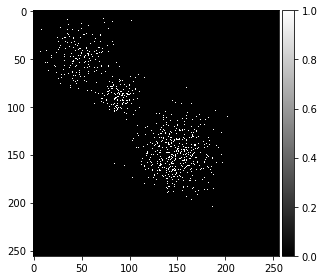

In [11]:
im = skimage.io.imread(files[3])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

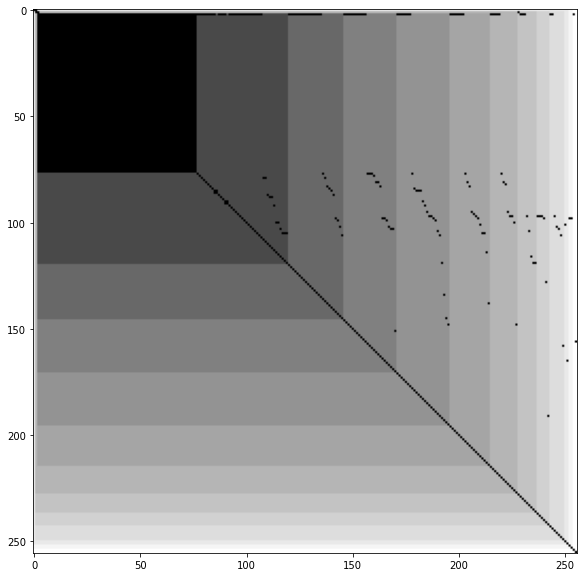

In [12]:
ivat(im)

Here again, we see three prominent squares nested in each other corresponding to the three clusters seen in the dataset.

### Image 5:

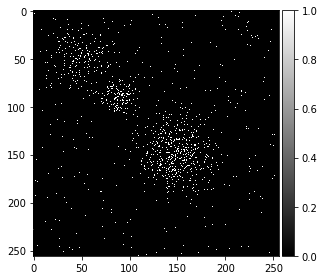

In [13]:
im = skimage.io.imread(files[4])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

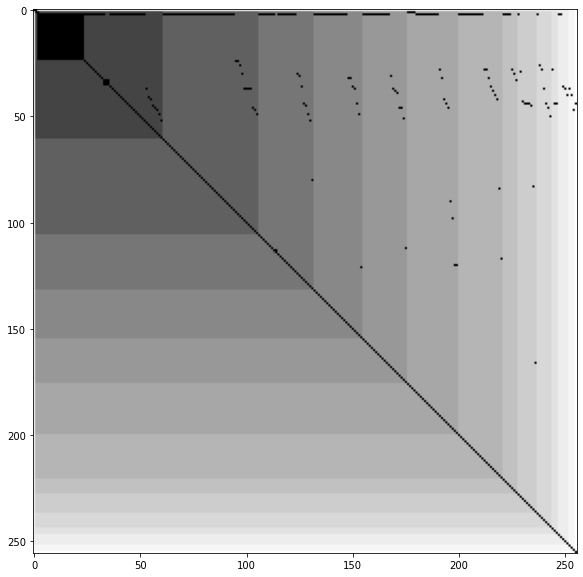

In [14]:
ivat(im)

Spread out data is reflected by many squares in the map. Only three prominent ones represent the three clusters.

### Image 6:

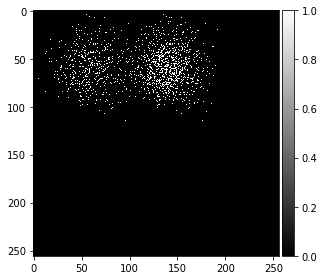

In [15]:
im = skimage.io.imread(files[5])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

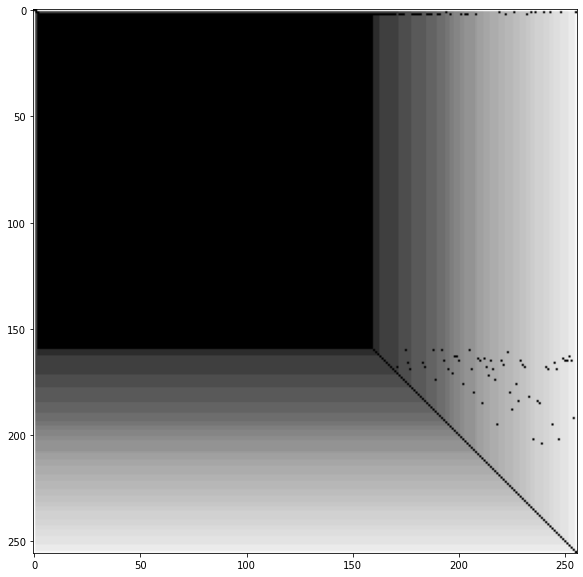

In [16]:
ivat(im)

Data is not spread out and is considered as one big cluster.

### Image 7:

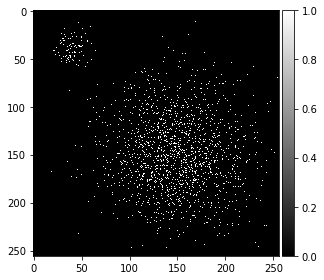

In [17]:
im = skimage.io.imread(files[6])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

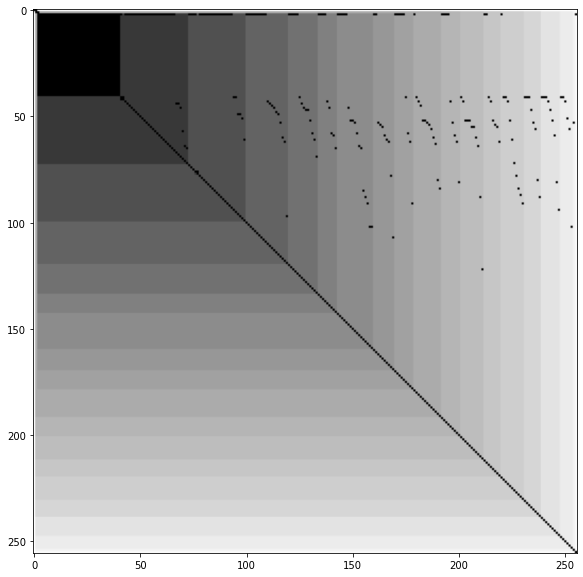

In [18]:
ivat(im)

Data is spread out (many squares) with two prominent clusters.

### Image 8:

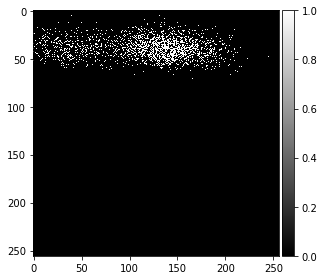

In [19]:
im = skimage.io.imread(files[7])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

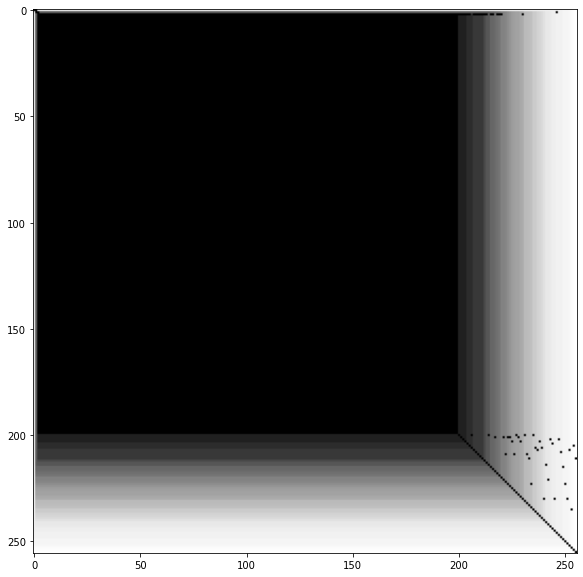

In [20]:
ivat(im)

Data is not spread out. One prominent cluster is detected.

### Image 9:

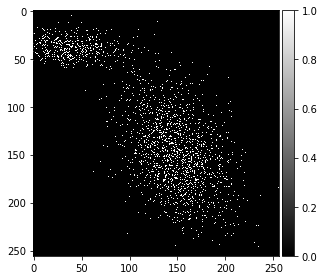

In [21]:
im = skimage.io.imread(files[8])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

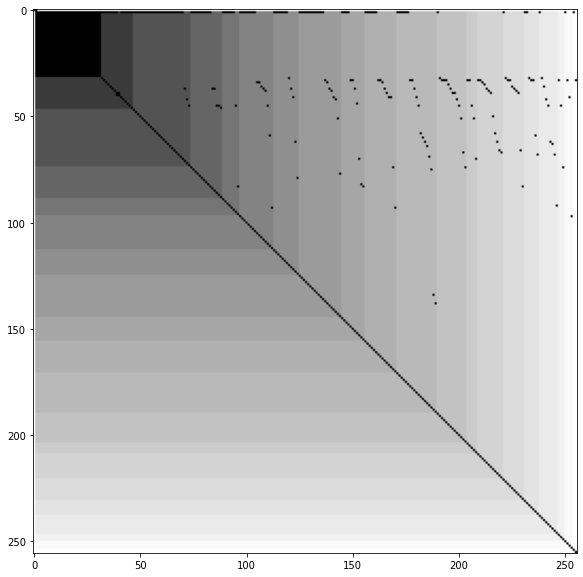

In [22]:
ivat(im)

Data is spread out. Two prominent clusters are detected.

### Image 10:

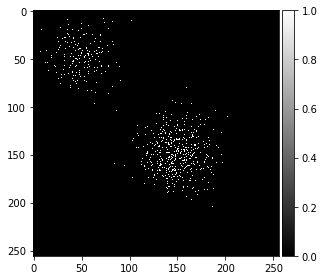

In [23]:
im = skimage.io.imread(files[9])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

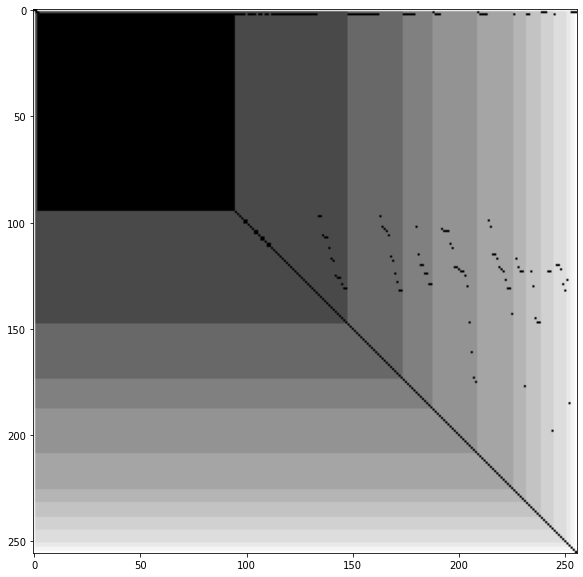

In [24]:
ivat(im)

Data is fairly spread out with two prominent clusters detected.

### Image 11:

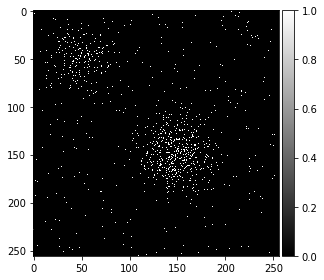

In [25]:
im = skimage.io.imread(files[10])
im = np.where(im==255, 0, 1)
skimage.io.imshow(im, cmap='gray')

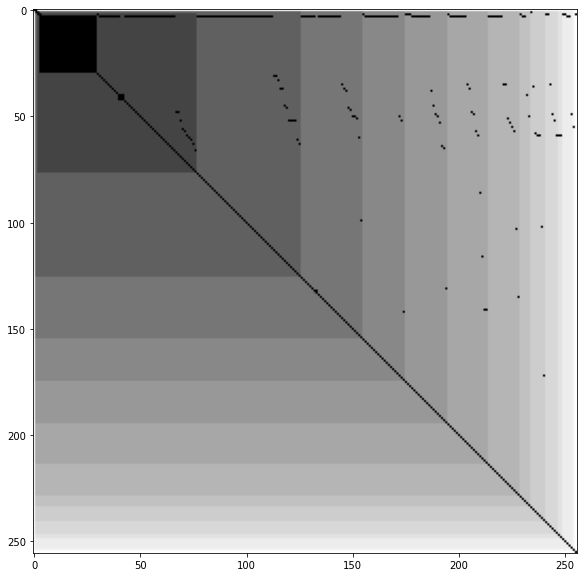

In [26]:
ivat(im)

Data is spread out with two prominent clusters.

## Conclusion:

From the images, we conclude that, if the data is spread out, the map shows many squares with different intensities (like in Image 7). If the data points are closer to each other, and there is less noise (i.e. there are not many data points outside of the clusters), the algorithm can succesfully determine the number of clusters (like in Image 10).
Overall, Visual Assessment Tendecy is great at giving us clues on the spread of the data. We can make use of it, when the machine learning algorithms ask us to enter the number of clusters.  